<h1>PROJECT</h1>

**Project Title**: Data Cleaning, Preprocessing, and Visualization of Student Performance Dataset

**Project Overview**:
> In this project, you will be working with a student performance dataset that contains information on students' demographic details and their scores in various subjects. The dataset also includes some inconsistencies, missing values, outliers, and data type errors that need to be addressed. Your task is to clean, preprocess, and visualize the data to gain meaningful insights into student performance.

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime
# Creating the enriched dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen', 'Ivy', 'Jack',
             'Alice', 'Eva', 'Charlie', 'Eva'],  # Duplicate names
    'Age': [25, 30, 35, np.nan, 40, 50, -999, 28, None, 45, 25, 30, 35, 40],  # Missing values, None, Outlier (-999)
    'Gender': ['Female', 'Male', 'male', 'Female', 'Female', np.nan, 'Female', 'f', 'Female', 'Male',
               'Female', 'Female', 'Male', 'Female'],  # Inconsistent capitalization
    'Math_Score': [88, 92, 100, 78, 85, np.nan, 110, 95, 60, 88, 88, np.nan, 'N/A', 85],  # Missing values, Outliers, Incorrect data type
    'Science_Score': [np.nan, 85, 95, 70, 'missing', 98, 100, 105, 60, 77, 85, 85, 70, 70],  # Missing values, Inconsistent data representation
    'Enrollment_Date': ['2020-01-15', '15/02/2020', '2020/03/10', 'April 5, 2020', np.nan, '2020-05-25',
                        '2020-06-30', 'July 10, 2020', '2020-08-15', '2020-09-01', '2020-01-15', '2020-05-25',
                        '2020/03/10', 'April 5, 2020'],  # Inconsistent date formats, Missing values
    'Graduated': ['Yes', 'No', 'No', 'Yes', 'No', np.nan, 'yes', 'No', 'Yes', 'no', 'Yes', 'No', 'No', 'Yes'],  # Inconsistent capitalization
}

# Converting into a DataFrame
df = pd.DataFrame(data)
df


,Name,Age,Gender,Math_Score,Science_Score,Enrollment_Date,Graduated
0,Alice,25.0,Female,88,NaN,2020-01-15,Yes
1,Bob,30.0,Male,92,85,15/02/2020,No
2,Charlie,35.0,male,100,95,2020/03/10,No
3,David,NaN,Female,78,70,"April 5, 2020",Yes
4,Eva,40.0,Female,85,missing,NaN,No
5,Frank,50.0,NaN,NaN,98,2020-05-25,NaN
6,Grace,-999.0,Female,110,100,2020-06-30,yes
7,Helen,28.0,f,95,105,"July 10, 2020",No
8,Ivy,NaN,Female,60,60,2020-08-15,Yes
9,Jack,45.0,Male,88,77,2020-09-01,no


**Issues Present in the Dataset:**<br>
**Duplicate Entries:**
> * Duplicate names and rows.<br>

**Missing Values:**
> * NaN, None, and 'missing' strings in numeric and categorical columns.

**Inconsistent Data Formats:**
> * Dates are in different formats (e.g., 2020-01-15, 15/02/2020, April 5, 2020).
Inconsistent capitalization in the Gender and Graduated columns.
Math_Score contains an outlier (110) and a non-numeric entry ('N/A').

**Outliers:**
> * Age column contains an outlier value of -999.
Math_Score has a score of 110, which might be unrealistic depending on the context.

**Incorrect Data Types:**
> * Science_Score has a string entry ('missing').<br>
> * Math_Score contains a non-numeric entry ('N/A').

**Lab Manual Steps for Cleaning and Preprocessing:**

1. **Handling Missing Values**: isna(), fillna(), dropna(), interpolate()
2. **Handling Inconsistent Data Formats**: str.lower(), str.replace(), to_datetime(), apply()
3. **Removing or Handling Duplicate Entries**: duplicated(), drop_duplicates()
4. **Handling Outliers**: clip(), IQR method, z-score, Winsorization
5. **Correcting Data Types**: astype(), to_numeric(), apply()

**Practical Walkthrough:**

**1. Removing Duplicates**

In [17]:
df.drop_duplicates(subset='Name', inplace=True)

**2. Hanndling Missing Values**

In [18]:
df = df.dropna()
df.head()

,Name,Age,Gender,Math_Score,Science_Score,Enrollment_Date,Graduated
1,Bob,30.0,Male,92,85,15/02/2020,No
2,Charlie,35.0,male,100,95,2020/03/10,No
6,Grace,-999.0,Female,110,100,2020-06-30,yes
7,Helen,28.0,f,95,105,"July 10, 2020",No
9,Jack,45.0,Male,88,77,2020-09-01,no


**3. Handling Inconsistent Data Formats**

In [ ]:
# change date format into the same type


**4. Handling Outliers**

In [19]:
df = df[df['Age'] >= 0]

In [6]:
df.head()

,Name,Age,Gender,Math_Score,Science_Score,Enrollment_Date,Graduated
1,Bob,30.0,Male,92,85,15/02/2020,No
2,Charlie,35.0,male,100,95,2020/03/10,No
7,Helen,28.0,f,95,105,"July 10, 2020",No
9,Jack,45.0,Male,88,77,2020-09-01,no


**5. Correcting Data Types**

In [20]:
df.loc[:, 'Graduated'] = df['Graduated'].replace({'no': 'NO', 'No': 'NO'})
df.loc[:, 'Gender'] = df['Gender'].replace({'male': 'Male', 'f': 'Female'})
# Function to parse and format dates
# def standardize_date(date_str):
#     # Try different date formats
#     date_formats = ['%d/%m/%Y', '%Y/%m/%d', '%B %d, %Y', '%Y-%m-%d']
#     for fmt in date_formats:
#         try:
#             return datetime.strptime(date_str, fmt).strftime('%d/%m/%Y')
#         except ValueError:
#             continue
#     return date_str  # Return original string if no format matches

# # Apply the function to the 'Enrollment_Date' column
# df['Enrollment_Date'] = df['Enrollment_Date'].apply(standardize_date)

**6. Visualizing the Distribution of Age**<br>This will help to see how the ages are distributed in the dataset.

In [10]:
import matplotlib.pyplot as plt

**7. Visualizing Gender Distribution**<br>A pie chart to show the proportion of males and females.

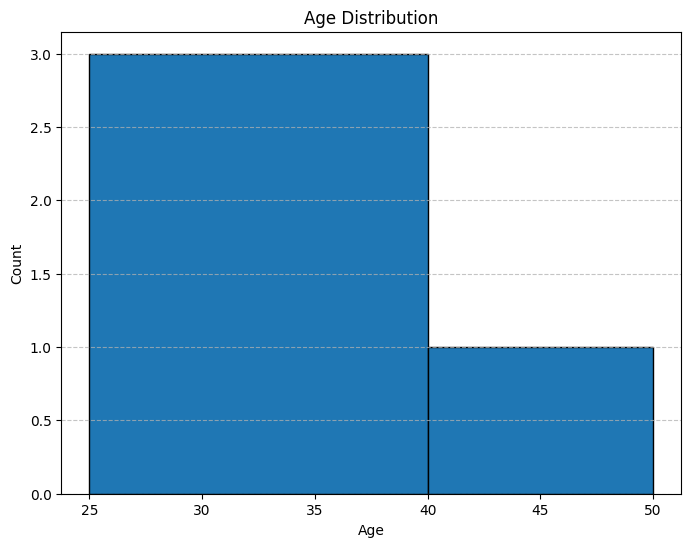

In [14]:
plt.figure(figsize=(8, 6))
# Define the bins
bins = [25, 40, 50]  # Adjust these as needed

# Create the histogram
plt.hist(df['Age'], bins=bins, edgecolor='black')

# Add labels and title
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Add grid lines for better readability
plt.grid(axis='y', alpha=0.75, linestyle='--')

# Show the plot
plt.show()

# Show the plot
plt.show()

**8. Scatter Plot for Math vs Science Scores**<br>This shows the relationship between Math and Science scores.

KeyError: 0

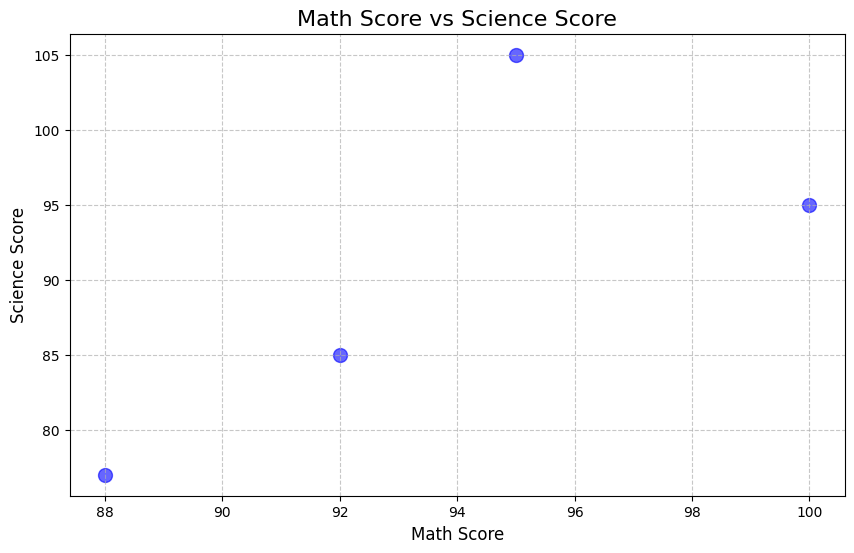

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Math_Score'], df['Science_Score'], color='blue', alpha=0.6, s=100)

# Add labels and title
plt.title('Math Score vs Science Score', fontsize=16)
plt.xlabel('Math Score', fontsize=12)
plt.ylabel('Science Score', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add student names as labels
for i, name in enumerate(df['Name']):
    plt.annotate(name, (df['Math_Score'][i], df['Science_Score'][i]), 
                 xytext=(5, 5), textcoords='offset points')

# Set axis limits
plt.xlim(80, 105)
plt.ylim(70, 110)

# Show the plot
plt.tight_layout()
plt.show()

**9. Histogram for Enrollment Dates**<br>This will help in visualizing the frequency of enrollments over time.

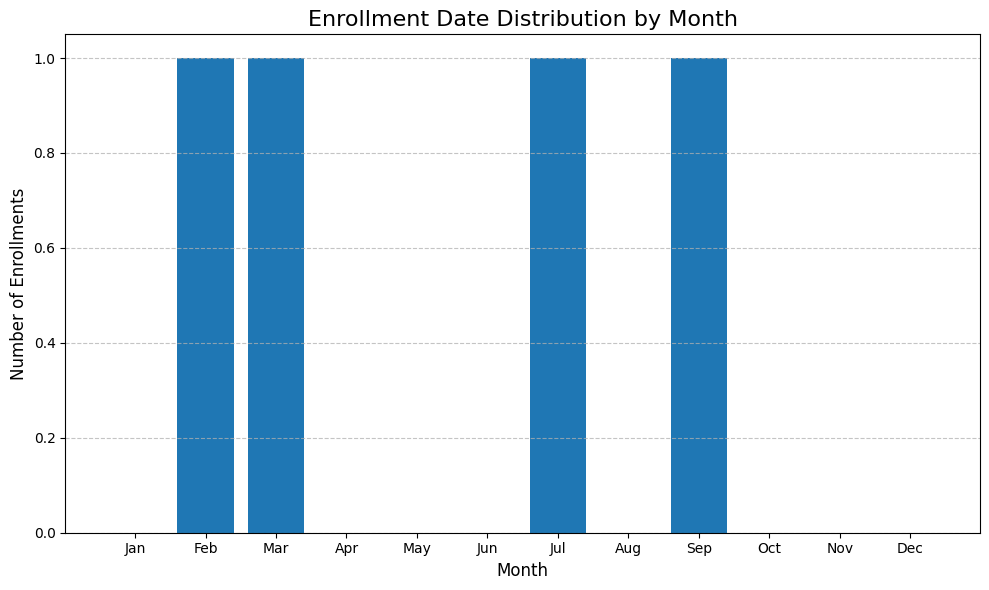

In [25]:
df['Enrollment_Date'] = pd.to_datetime(df['Enrollment_Date'], format='mixed')
df['Enrollment_Month'] = df['Enrollment_Date'].dt.month
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Enrollment_Month'], bins=range(1, 14), align='left', rwidth=0.8)

# Add labels and title
plt.title('Enrollment Date Distribution by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Enrollments', fontsize=12)

# Set x-axis ticks to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)

# Add grid lines for better readability
plt.grid(axis='y', alpha=0.75, linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

**10. Pair Plot to Visualize Relationships**<br>
Create a pair plot to see relationships between Age, Math_Score, and Science_Score.

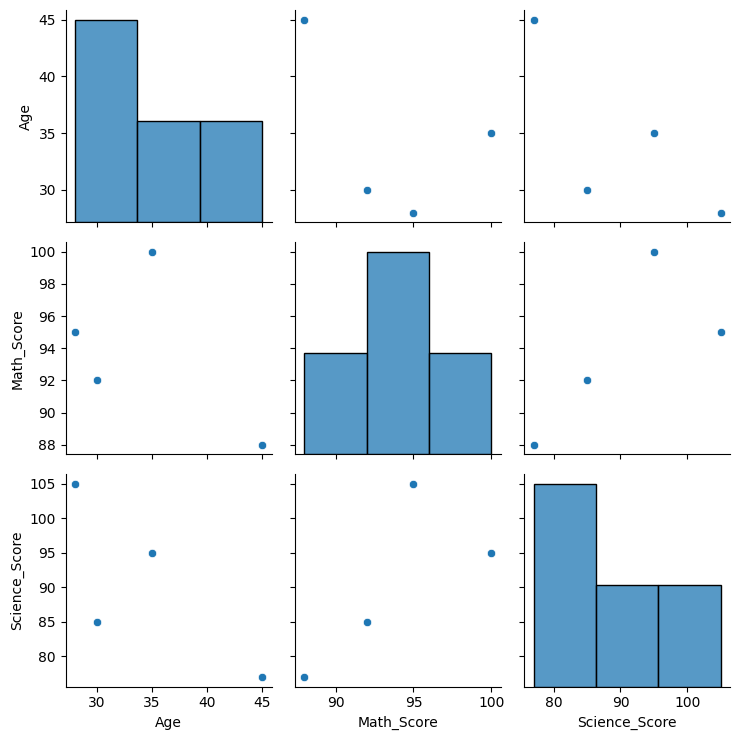

In [27]:
import seaborn as sns
sns.pairplot(df, vars=['Age', 'Math_Score', 'Science_Score'], height=2.5)
plt.tight_layout()
plt.show()

**10. Violin Plot for Score Distributions**<br>
Create a violin plot to show the distribution of Math_Score and Science_Score by Gender.

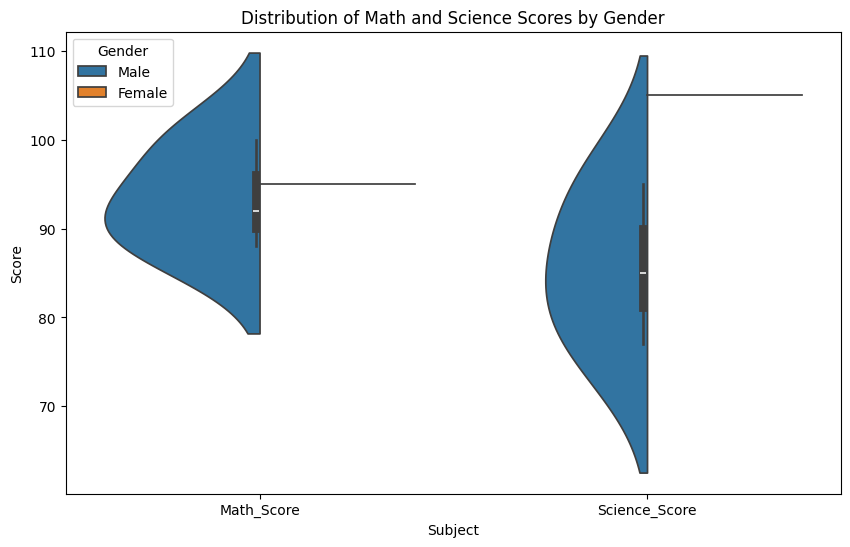

In [28]:
data_long = pd.melt(df, id_vars=['Gender'], value_vars=['Math_Score', 'Science_Score'], 
                    var_name='Subject', value_name='Score')

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Subject', y='Score', hue='Gender', data=data_long, split=True)
plt.title('Distribution of Math and Science Scores by Gender')
plt.xlabel('Subject')
plt.ylabel('Score')
plt.show()

**11. Box Plot of Scores by Graduation Status**<br>
Show the distribution of Math_Score and Science_Score based on whether the student graduated.

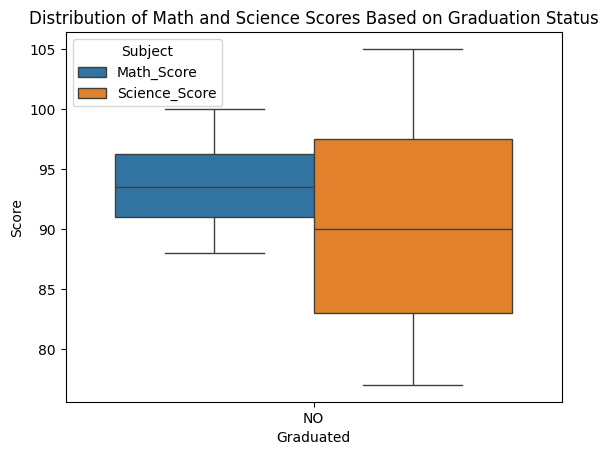

In [30]:
df_melted = df.melt(id_vars=['Graduated'], value_vars=['Math_Score', 'Science_Score'], var_name='Subject', value_name='Score')

sns.boxplot(x='Graduated', y='Score', hue='Subject', data=df_melted)

# Set labels and title
plt.title('Distribution of Math and Science Scores Based on Graduation Status')
plt.xlabel('Graduated')
plt.ylabel('Score')

# Display the plot
plt.show()

**12. KDE Plot of Scores**<br>
Create Kernel Density Estimation (KDE) plots for Math_Score and Science_Score.

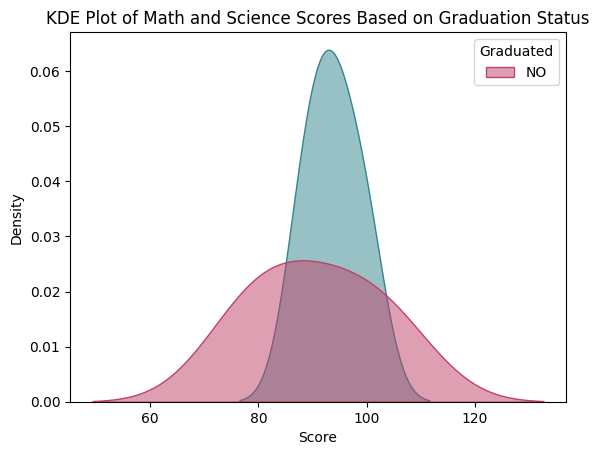

In [31]:
sns.kdeplot(data=df, x='Math_Score', hue='Graduated', fill=True, common_norm=False, palette='crest', alpha=0.5)
sns.kdeplot(data=df, x='Science_Score', hue='Graduated', fill=True, common_norm=False, palette='flare', alpha=0.5)

# Set labels and title
plt.title('KDE Plot of Math and Science Scores Based on Graduation Status')
plt.xlabel('Score')
plt.ylabel('Density')

# Show the plot
plt.show()

**13. Histogram for Each Numerical Column**<br>
Create histograms for all numerical columns (Age, Math_Score, Science_Score).

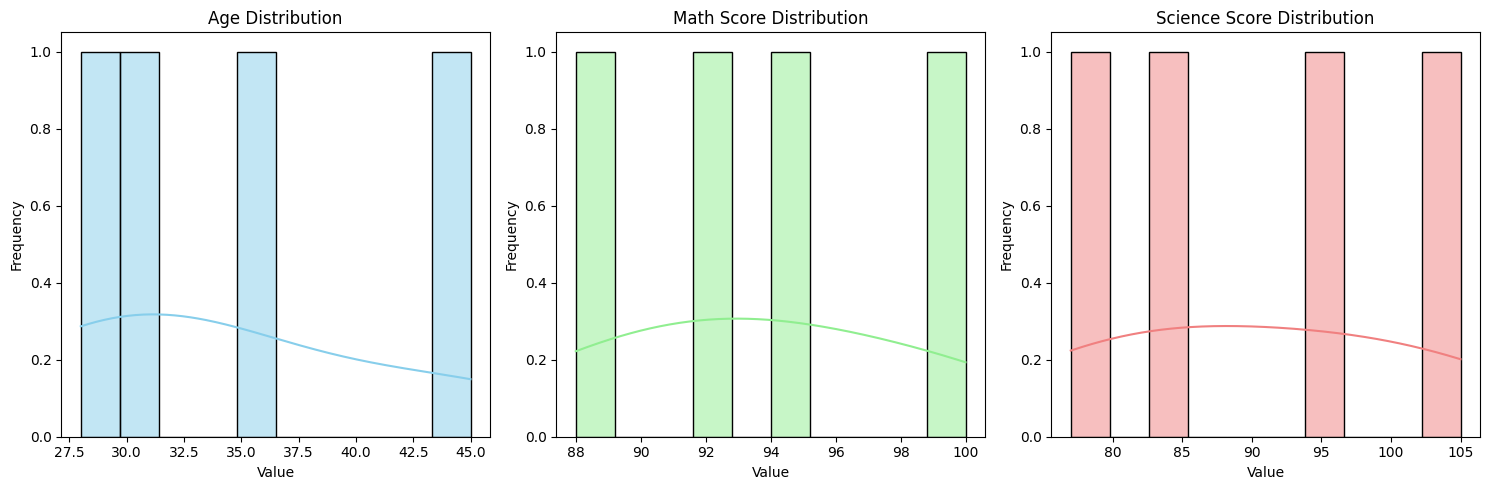

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for Age, Math_Score, and Science_Score
sns.histplot(df['Age'], bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

sns.histplot(df['Math_Score'], bins=10, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Math Score Distribution')

sns.histplot(df['Science_Score'], bins=10, kde=True, ax=axes[2], color='lightcoral')
axes[2].set_title('Science Score Distribution')

# Set labels for all axes
for ax in axes:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()